In [2]:
import numpy as np
import tensorflow as tf
from captcha.image import ImageCaptcha
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

/Users/lance/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
number = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
ALPHABET = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

In [4]:
def random_captcha_text(char_set=number+alphabet+ALPHABET, captcha_size=4):
#captcha_size=4指定验证码的长度是4，最好不要太长，不然训练时间太长
#def random_captcha_text(char_set=number, captcha_size=4):
    captcha_text = []
    for i in range(captcha_size):
        c = random.choice(char_set)
        captcha_text.append(c)
    return captcha_text

In [5]:

def gen_captcha_text_and_image():
    image = ImageCaptcha()

    captcha_text = random_captcha_text()
    #把list转化为str类型
    captcha_text = ''.join(captcha_text)

    captcha = image.generate(captcha_text)
    # image.write(captcha_text, captcha_text + '.jpg')

    captcha_image = Image.open(captcha)
    captcha_image = np.array(captcha_image)
    return captcha_text, captcha_image

验证码图像的通道channel: (60, 160, 3)


<function matplotlib.pyplot.show>

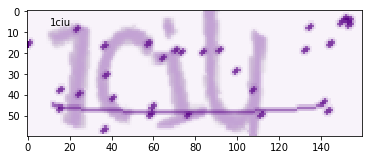

In [7]:
text,image=gen_captcha_text_and_image()
print('验证码图像的通道channel:',image.shape)
f=plt.figure()
ax=f.add_subplot(111)
#transAxes 属性获得子图坐标转换对象，通过Figure 对象的transFigure 属性获得图表坐标转换对象。
#通过坐标转换对象的transform() 方法，可以将此坐标系下的点转换为窗口坐标系中的坐标点
ax.text(0.1,0.9,text,ha='center',va='center',transform=ax.transAxes)
plt.imshow(image)
plt.show

In [8]:
image

array([[[248, 243, 250],
        [248, 243, 250],
        [248, 243, 250],
        ...,
        [248, 243, 250],
        [248, 243, 250],
        [248, 243, 250]],

       [[248, 243, 250],
        [248, 243, 250],
        [248, 243, 250],
        ...,
        [248, 243, 250],
        [248, 243, 250],
        [248, 243, 250]],

       [[248, 243, 250],
        [248, 243, 250],
        [248, 243, 250],
        ...,
        [248, 243, 250],
        [248, 243, 250],
        [248, 243, 250]],

       ...,

       [[248, 243, 250],
        [248, 243, 250],
        [248, 243, 250],
        ...,
        [248, 243, 250],
        [248, 243, 250],
        [248, 243, 250]],

       [[248, 243, 250],
        [248, 243, 250],
        [248, 243, 250],
        ...,
        [248, 243, 250],
        [248, 243, 250],
        [248, 243, 250]],

       [[248, 243, 250],
        [248, 243, 250],
        [248, 243, 250],
        ...,
        [248, 243, 250],
        [248, 243, 250],
        [248, 243, 250]]

In [10]:
#转换为灰度图
def convert2gray(img):
    if len(img.shape) > 2:
        gray = np.mean(img, -1)
        # 上面的转法较快，正规转法如下
        # r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
        # gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
        return gray
    else:
        return img

In [13]:
img=convert2gray(image)
print(img.shape)
print(img)

(60, 160)
[[247. 247. 247. ... 247. 247. 247.]
 [247. 247. 247. ... 247. 247. 247.]
 [247. 247. 247. ... 247. 247. 247.]
 ...
 [247. 247. 247. ... 247. 247. 247.]
 [247. 247. 247. ... 247. 247. 247.]
 [247. 247. 247. ... 247. 247. 247.]]


In [6]:
#文字转换，文本转换为向量
def text2vec(text):
    text_len = len(text)
    if text_len > MAX_CAPTCHA:
        raise ValueError('验证码最长%d个字符'%MAX_CAPTCHA)
    #生成MAX_CAPTCHA * CHAR_SET_LEN的都是0的矩阵
    vector = np.zeros(MAX_CAPTCHA * CHAR_SET_LEN)
    
    def char2pos(c):
        if c =='_':
            k = 62
            return k
        k = ord(c)-48
        if k > 9:
            k = ord(c) - 55
            if k > 35:
                k = ord(c) - 61
                if k > 61:
                    raise ValueError('No Map')
        return k
    
    for i, c in enumerate(text):
        idx = i * CHAR_SET_LEN +int(char2pos(c))
        vector[idx] = 1
    return vector

In [7]:
# 向量转回文本
def vec2text(vec):
    
    char_pos = vec.nonzero()[0]
    text=[]
    for i, c in enumerate(char_pos):
        char_at_pos = i #c/63
        char_idx = c % CHAR_SET_LEN
        if char_idx < 10:
            char_code = char_idx + ord('0')
        elif char_idx <36:
            char_code = char_idx - 10 + ord('A')
        elif char_idx < 62:
            char_code = char_idx-  36 + ord('a')
        elif char_idx == 62:
            char_code = ord('_')
        else:
            raise ValueError('error')
        text.append(chr(char_code))
    '''
    text = []
    char_pos = vec.nonzero()[0]
    for i, c in enumerate(char_pos):
        number = i % 10
        text.append(str(number))
    '''
    return "".join(text)
    

In [8]:
"""
#向量（大小MAX_CAPTCHA*CHAR_SET_LEN）用0,1编码 每63个编码一个字符，这样顺利有，字符也有
vec = text2vec("F5Sd")
text = vec2text(vec)
print(text)  # F5Sd
vec = text2vec("SFd5")
text = vec2text(vec)
print(text)  # SFd5
"""


# 生成一个训练batch
def get_next_batch(batch_size=128):
    batch_x = np.zeros([batch_size, IMAGE_HEIGHT * IMAGE_WIDTH])
    batch_y = np.zeros([batch_size, MAX_CAPTCHA * CHAR_SET_LEN])

    # 有时生成图像大小不是(60, 160, 3)
    def wrap_gen_captcha_text_and_image():
        while True:
            text, image = gen_captcha_text_and_image()
            if image.shape == (60, 160, 3):
                return text, image

    for i in range(batch_size):
        text, image = wrap_gen_captcha_text_and_image()
        image = convert2gray(image)

        batch_x[i, :] = image.flatten() / 255  # (image.flatten()-128)/128  mean为0
        batch_y[i, :] = text2vec(text)

    return batch_x, batch_y


In [9]:
# 定义CNN
def crack_captcha_cnn(w_alpha=0.01, b_alpha=0.1):
    x = tf.reshape(X, shape=[-1, IMAGE_HEIGHT, IMAGE_WIDTH, 1])

    # w_c1_alpha = np.sqrt(2.0/(IMAGE_HEIGHT*IMAGE_WIDTH)) #
    # w_c2_alpha = np.sqrt(2.0/(3*3*32))
    # w_c3_alpha = np.sqrt(2.0/(3*3*64))
    # w_d1_alpha = np.sqrt(2.0/(8*32*64))
    # out_alpha = np.sqrt(2.0/1024)

    # 3 conv layer
    w_c1 = tf.Variable(w_alpha * tf.random_normal([3, 3, 1, 32]))
    b_c1 = tf.Variable(b_alpha * tf.random_normal([32]))
    conv1 = tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(x, w_c1, strides=[1, 1, 1, 1], padding='SAME'), b_c1))
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv1 = tf.nn.dropout(conv1, keep_prob)

    w_c2 = tf.Variable(w_alpha * tf.random_normal([3, 3, 32, 64]))
    b_c2 = tf.Variable(b_alpha * tf.random_normal([64]))
    conv2 = tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(conv1, w_c2, strides=[1, 1, 1, 1], padding='SAME'), b_c2))
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv2 = tf.nn.dropout(conv2, keep_prob)

    w_c3 = tf.Variable(w_alpha * tf.random_normal([3, 3, 64, 64]))
    b_c3 = tf.Variable(b_alpha * tf.random_normal([64]))
    conv3 = tf.nn.relu(tf.nn.bias_add(tf.nn.conv2d(conv2, w_c3, strides=[1, 1, 1, 1], padding='SAME'), b_c3))
    conv3 = tf.nn.max_pool(conv3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
    conv3 = tf.nn.dropout(conv3, keep_prob)

    # Fully connected layer
    w_d = tf.Variable(w_alpha * tf.random_normal([8 * 20 * 64, 1024]))
    b_d = tf.Variable(b_alpha * tf.random_normal([1024]))
    dense = tf.reshape(conv3, [-1, w_d.get_shape().as_list()[0]])
    dense = tf.nn.relu(tf.add(tf.matmul(dense, w_d), b_d))
    dense = tf.nn.dropout(dense, keep_prob)

    w_out = tf.Variable(w_alpha * tf.random_normal([1024, MAX_CAPTCHA * CHAR_SET_LEN]))
    b_out = tf.Variable(b_alpha * tf.random_normal([MAX_CAPTCHA * CHAR_SET_LEN]))
    out = tf.add(tf.matmul(dense, w_out), b_out)
    return out


In [10]:
# 训练
def train_crack_captcha_cnn():
    #CNN 训练过程
    output = crack_captcha_cnn()
    #损失函数
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=output, labels=Y))
    #Adam函数
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)
    #转换矩阵形状
    predict = tf.reshape(output, [-1, MAX_CAPTCHA, CHAR_SET_LEN])
    max_idx_p = tf.argmax(predict, 2)
    max_idx_l = tf.argmax(tf.reshape(Y, [-1, MAX_CAPTCHA, CHAR_SET_LEN]), 2)
    #相等的判断
    correct_pred = tf.equal(max_idx_p, max_idx_l)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    saver = tf.train.Saver()
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        step = 1
        while True:
            batch_x, batch_y = get_next_batch(64)
            _, loss_ = sess.run([optimizer, loss], feed_dict={X: batch_x, Y: batch_y, keep_prob: 0.75})

            # 每10 step计算一次准确率
            if step % 10 == 0:
                batch_x_test, batch_y_test = get_next_batch(100)
                acc = sess.run(accuracy, feed_dict={X: batch_x_test, Y: batch_y_test, keep_prob: 1.})
                print(step, acc)
                # 如果准确率大于90%,保存模型,完成训练
                if acc > 0.9:
                    #持久化
                    saver.save(sess, "./model/crack_capcha.model", global_step=step)
                    writer = tf.summary.FileWriter(r"C:\Users\ibf\Documents\code\tf",tf.get_default_graph())
                    writer.close()
                    break
            
            step += 1

In [11]:
def crack_captcha(captcha_image):
    output = crack_captcha_cnn()

    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, "./model/crack_capcha.model-1690")

        predict = tf.argmax(tf.reshape(output, [-1, MAX_CAPTCHA, CHAR_SET_LEN]), 2)
        text_list = sess.run(predict, feed_dict={X: [captcha_image], keep_prob: 1})
        text = text_list[0].tolist()
        return text

In [12]:
if __name__ == '__main__':
    train = 0
    if train == 0:
        number = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
        alphabet = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']
        ALPHABET = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

        #生成验证码值和图片
        text, image = gen_captcha_text_and_image()
        print("验证码图像channel:", image.shape)  # (60, 160, 3)
        # 图像大小
        IMAGE_HEIGHT = 60
        IMAGE_WIDTH = 160
        MAX_CAPTCHA = len(text)
        print("验证码文本最长字符数", MAX_CAPTCHA)
        # 文本转向量
        char_set = number + alphabet + ALPHABET + ['_']  # 如果验证码长度小于4, '_'用来补齐
        #char_set = number
        CHAR_SET_LEN = len(char_set)

        X = tf.placeholder(tf.float32, [None, IMAGE_HEIGHT * IMAGE_WIDTH])
        Y = tf.placeholder(tf.float32, [None, MAX_CAPTCHA * CHAR_SET_LEN])
        keep_prob = tf.placeholder(tf.float32)  # dropout

        train_crack_captcha_cnn()
    if train == 1:
        number = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
        IMAGE_HEIGHT = 60
        IMAGE_WIDTH = 160
        char_set = number
        CHAR_SET_LEN = len(char_set)

        text, image = gen_captcha_text_and_image()

        f = plt.figure()
        ax = f.add_subplot(111)
        ax.text(0.1, 0.9, text, ha='center', va='center', transform=ax.transAxes)
        plt.imshow(image)

        plt.show()

        MAX_CAPTCHA = len(text)
        image = convert2gray(image)
        image = image.flatten() / 255

        X = tf.placeholder(tf.float32, [None, IMAGE_HEIGHT * IMAGE_WIDTH])
        Y = tf.placeholder(tf.float32, [None, MAX_CAPTCHA * CHAR_SET_LEN])
        keep_prob = tf.placeholder(tf.float32)  # dropout
        #调用模型预测
        predict_text = crack_captcha(image)

        print("正确: {}  预测: {}".format(text, predict_text))

验证码图像channel: (60, 160, 3)
验证码文本最长字符数 4
0 0.693561
0 0.015
1 0.601046
2 0.404231
3 0.165294
4 0.0877741
5 0.130522
6 0.177783
7 0.201767
8 0.205211
9 0.185541
10 0.167972
10 0.0075
11 0.138157
12 0.116696
13 0.0990041
14 0.0928696
15 0.0950762
16 0.101178
17 0.108839
18 0.108699
19 0.100613
20 0.0934028
20 0.0225
21 0.0863907
22 0.0832101
23 0.0838493
24 0.0850849
25 0.0861221
26 0.0879307
27 0.0886742
28 0.0895496
29 0.087946
30 0.0870701
30 0.0325
31 0.0868293
32 0.0849812
33 0.0845353
34 0.0860894
35 0.0865519
36 0.0859071
37 0.0864231
38 0.0863035
39 0.0850864
40 0.0836811
40 0.0175
41 0.0831388
42 0.0827527
43 0.0822481
44 0.0833011
45 0.0836357
46 0.08392
47 0.0835746
48 0.0829751
49 0.0839486
50 0.0820225
50 0.01
51 0.0829628
52 0.0829924
53 0.0831032
54 0.0840933
55 0.0836228
56 0.082964
57 0.083448
58 0.0829889
59 0.0829723
60 0.0830935
60 0.01
61 0.0821391
62 0.0836439
63 0.0823244
64 0.0820535
65 0.0836811
66 0.082956
67 0.0829595
68 0.0829176
69 0.0828673
70 0.0822838
70 0.